In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow import keras 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import sklearn
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import tensorflow

In [6]:
img_height, img_width = (224,224)
batch_size = 15

train_data_dir = r"G:/GAIP/output_final/train"
valid_data_dir = r"G:/GAIP/output_final/val"
test_data_dir = r"G:/GAIP/output_final/test"
#test_data_dir = r"/content/drive/MyDrive/outputfolder/test"
#image.open()

In [7]:

train_datagen = ImageDataGenerator(
                                     shear_range=0.2,zoom_range=0.2,
                                 horizontal_flip=True,
                                   validation_split=0.4,
                                    rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size = batch_size, 
                                                      class_mode='categorical')
                       
                                       #   subset='training')# set as training data

valid_generator = train_datagen.flow_from_directory(valid_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size = batch_size, 
                                                    class_mode='categorical')
                                                    #subset='validation') #set as validation data  
                                                                                                       

Found 487 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


In [8]:
train_generator.class_indices

{'Center Eyes': 0, 'closed_spare': 1, 'left_movement': 2, 'right_movement': 3}

In [9]:
y_train = train_generator.classes
len(y_train)

487

In [10]:
nb_validation_samples = 60

In [17]:
dir(train_generator)
#type(train_generator.labels)
print(train_generator.classes)
#y_train = train_generator.classes
y_train = train_generator.classes
y_train.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]


(487,)

In [18]:
test_generator = train_datagen.flow_from_directory(test_data_dir,
                                                    target_size=(img_height, img_width),
                                   
                                                   batch_size = 1, 
                                                    class_mode='categorical')
                                                    #subset='validation') #set as testing data

Found 63 images belonging to 4 classes.


In [19]:
x,y = test_generator.next()
x.shape
#print(type(x))
#x

(1, 224, 224, 3)

In [34]:
import math
import numpy as np
import scipy
import h5py
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization  
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from matplotlib.pyplot import imshow
def Gaip_model_1(input_shape, outputClasses):
  
    #X_input = keras.Input(shape=(224, 224, 3))
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
   # X_2 = X
    
    # Stage 0
    #X = Conv2D(16, (3, 3), strides=(1, 1), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
   # X = BatchNormalization(axis=3, name='bn_conv1')(X)
   #X = Activation('relu')(X)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    
    X_2 = X
    #stage1:
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    #stage2:
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    #stage3:
    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    
    #shortpath:
    X_2 = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X_2)
    X_2 = MaxPooling2D((3, 3), strides=(2, 2))(X_2)
    X_2 = BatchNormalization(axis=3)(X_2)
    
    X = Add()([X,X_2])
    X = Activation('relu')(X)
    
    #avg_pooling
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    #flattening
    X = Flatten()(X)
    #fully_connected
    X = Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dense(4, activation='softmax')(X)
    
    model = Model(inputs = X_input, outputs=X, name='define_model_4')
    return model
    
   
    

In [35]:
model = Gaip_model_1(input_shape = (224,224,3), outputClasses =4)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','mse'])
model.summary()

Model: "define_model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_8 (ZeroPadding2D (None, 230, 230, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 230, 230, 32) 896         zero_padding2d_8[0][0]           
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 230, 230, 32) 9248        conv2d_48[0][0]                  
_____________________________________________________________________________________

In [37]:
# 100 epochs for Resnet50 model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

#checkpointing
#checkpoint_path = "/content/drive/MyDrive/cp-0021.ckpt.data-00000-of-00001"
#checkpoint_path = "C:/Users/DHANVANTH/SAMSUNG/Resnet/cp-0021.ckpt.data-00000-of-00001"
checkpoint_path = "G:/GAIP/Gaip_model/cp-0021.ckpt.data-00000-of-00001"
checkpoint_dir = os.path.dirname(checkpoint_path)

#Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(monitor = 'val_accuracy',
   filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    #save_freq=5*batch_size,
     save_best_only = True,                                                    
      mode='max')


#Reduce learning rate when a metric has stopped improving.
# Models often benefit 
#from reducing the learning rate by a factor of 2-10
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.2, patience=2, min_lr=0.00001)



# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model_history = model.fit(train_generator, epochs = 5,callbacks=[cp_callback, reduce_lr],
                          validation_data=valid_generator,
    validation_steps=nb_validation_samples // batch_size)
           # Pass callback to training

Epoch 1/5
33/33 [==============================] - ETA: 0s - loss: 45.9149 - accuracy: 0.3224 - mse: 0.3287
Epoch 00001: val_accuracy improved from -inf to 0.25000, saving model to G:/GAIP/Gaip_model\cp-0021.ckpt.data-00000-of-00001
33/33 [==============================] - 169s 5s/step - loss: 45.9149 - accuracy: 0.3224 - mse: 0.3287 - val_loss: 1803.6641 - val_accuracy: 0.2500 - val_mse: 0.3750
Epoch 2/5
33/33 [==============================] - ETA: 0s - loss: 15.7465 - accuracy: 0.3901 - mse: 0.2924
Epoch 00002: val_accuracy did not improve from 0.25000
33/33 [==============================] - 149s 5s/step - loss: 15.7465 - accuracy: 0.3901 - mse: 0.2924 - val_loss: 226.8255 - val_accuracy: 0.1500 - val_mse: 0.4243
Epoch 3/5
33/33 [==============================] - ETA: 0s - loss: 9.4350 - accuracy: 0.4374 - mse: 0.2674
Epoch 00003: val_accuracy did not improve from 0.25000
33/33 [==============================] - 147s 4s/step - loss: 9.4350 - accuracy: 0.4374 - mse: 0.2674 - val_los

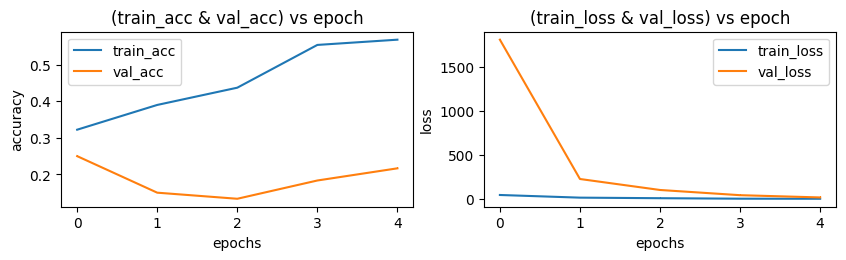

<Figure size 640x480 with 0 Axes>

In [38]:
def plot_accuracy_loss(history):
    
    fig = plt.figure(figsize=(10,5))

    plt.subplot(221)
    #plt.plot(history.history['accuracy'],'bo--', label = "train_acc")
    plt.plot(history.history['accuracy'],marker = ',',ms = 10, label = "train_acc")
    plt.plot(history.history['val_accuracy'], marker = ',', label = "val_acc")
    plt.title("(train_acc & val_acc) vs epoch")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    plt.subplot(222)
    plt.plot(history.history['loss'],marker= ',', label = "train_loss")
    plt.plot(history.history['val_loss'], marker=',' , label = "val_loss")
    plt.title("(train_loss & val_loss) vs epoch")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    f = plt.figure()
    plt.show()
  


plot_accuracy_loss(model_history)
f = plt.figure()
#f.savefig('C:/Users/DHANVANTH/SAMSUNG/resnet_50_epoch_vs_acc', bbox_inches='tight', dpi=600)

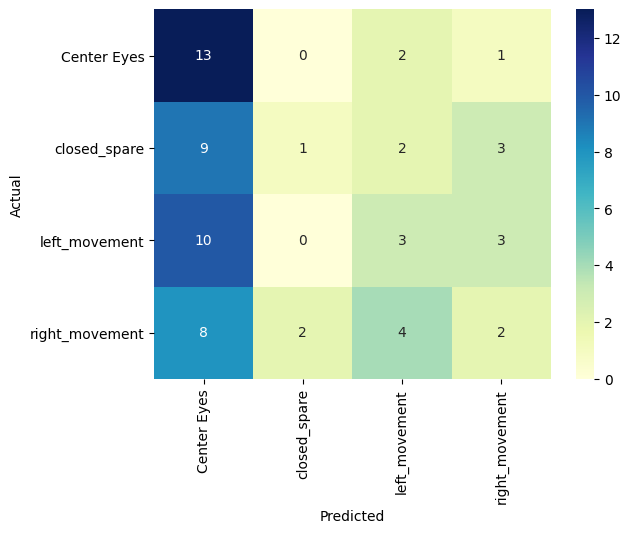

test accuracy: 30.158730158730158


In [39]:
#to plot confusion matrix for 100 epochs
import pandas as pd
import seaborn as sn
import tensorflow as tf

#model = tf.keras.models.load_model("Reflection_dataset\Saved_Model\Mobilenet_reflection.h5")
#model = model_1
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns = ['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,cmap="YlGnBu", annot = True,fmt='d')
plt.show()
print('test accuracy: {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [ ]:
model_json = classifier.to_json()
with open("model_new.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
classifier.save_weights('model_new.h5')
print('Weights saved')

In [ ]:
import math
import numpy as np
import scipy
import h5py
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization  
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from matplotlib.pyplot import imshow
def Gaip_model_1(input_shape, outputClasses):
  
    #X_input = keras.Input(shape=(224, 224, 3))
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
   # X_2 = X
    
    # Stage 0
    #X = Conv2D(16, (3, 3), strides=(1, 1), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
   # X = BatchNormalization(axis=3, name='bn_conv1')(X)
   #X = Activation('relu')(X)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    
    X_2 = X
    #stage1:
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    #stage2:
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    #stage3:
    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    
    #shortpath:
    X_2 = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X_2)
    X_2 = MaxPooling2D((3, 3), strides=(2, 2))(X_2)
    X_2 = BatchNormalization(axis=3)(X_2)
    
    X = Add()([X,X_2])
    X = Activation('relu')(X)
    
    #avg_pooling
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    #flattening
    X = Flatten()(X)
    #fully_connected
    X = Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dense(4, activation='softmax')(X)
    
    model = Model(inputs = X_input, outputs=X, name='define_model_4')
    return model
    
   
    

In [ ]:
model = Gaip_model_1(input_shape = (224,224,3), outputClasses =4)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','mse'])
model.summary()